In [58]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import optuna
import xgboost as xgb

import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [72]:
scores_linear = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_linear.csv') 
scores_lassoRidgeElastic = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_lassoRidgeElastic.csv') 
scores_randomForest = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_randomForest.csv') 
scores_xgboost = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_xgboost.csv') 
scores_scikitGB = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_scikitBoosting.csv') 
scores_catboost = pd.read_csv('~/Documents/AmesHousingML/model_building/masterScores_catboost.csv') 
scores_df = pd.concat([scores_linear, scores_lassoRidgeElastic, scores_randomForest, 
                       scores_xgboost, scores_scikitGB, scores_catboost], ignore_index=True)

In [60]:
scores_df

# output_file = '~/Documents/AmesHousingML/scores_old_test.csv'

# scores_df.to_csv(output_file, index=False, mode='w')

# print(f"DataFrame exported to '{output_file}' in the same working directory.")

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
0,MLR,dummified_threeXOutlier,0.842156,26329.284397
1,MLR,dummified_onlyNormalCondition,0.867671,25700.214359
2,MLR,dummified_allOutliers,0.817061,31730.596638
3,lasso,dummifiedNoDrop_threeXOutlier,0.899725,20901.033141
4,lasso,dummifiedNoDrop_onlyNormalCondition,0.933296,18203.509019
5,lasso,dummifiedNoDrop_allOutliers,0.891631,24067.062932
6,ridge,dummifiedNoDrop_threeXOutlier,0.897200,21132.978955
7,ridge,dummifiedNoDrop_onlyNormalCondition,0.931033,18516.622484
8,ridge,dummifiedNoDrop_allOutliers,0.893286,23982.313218
9,elasticNet,dummifiedNoDrop_threeXOutlier,0.899543,20924.639689


In [61]:
sorted_scores = scores_df.sort_values(by='r2_5kf_mean')
sorted_scores

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
2,MLR,dummified_allOutliers,0.817061,31730.596638
0,MLR,dummified_threeXOutlier,0.842156,26329.284397
1,MLR,dummified_onlyNormalCondition,0.867671,25700.214359
5,lasso,dummifiedNoDrop_allOutliers,0.891631,24067.062932
8,ridge,dummifiedNoDrop_allOutliers,0.893286,23982.313218
35,xgboost,dummified_allOutliers,0.896948,24052.156077
6,ridge,dummifiedNoDrop_threeXOutlier,0.897200,21132.978955
11,elasticNet,dummifiedNoDrop_allOutliers,0.897469,23648.736387
15,randomForest,dummified_threeXOutlier,0.897686,21340.686856
18,randomForest,dummifiedNoDrop_threeXOutlier,0.898322,21273.463159


In [62]:
opp_sorted_scores = scores_df.sort_values(by='r2_5kf_mean', ascending = False)
opp_sorted_scores

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
82,catboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.949319,15834.922426
43,xgboost_tuned,dummified_onlyNormalCondition,0.948063,16036.566846
46,xgboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.947439,16140.245410
40,xgboost_tuned,ordinal_onlyNormalCondition,0.945529,16422.205699
76,catboost_tuned,ordinal_onlyNormalCondition,0.945148,16470.914927
79,catboost_tuned,dummified_onlyNormalCondition,0.944098,16615.987906
61,scikit_gb_tuned,dummified_onlyNormalCondition,0.939710,17222.610384
64,scikit_gb_tuned,dummifiedNoDrop_onlyNormalCondition,0.939211,17275.923095
67,catboost,ordinal_onlyNormalCondition,0.938718,17394.528056
58,scikit_gb_tuned,ordinal_onlyNormalCondition,0.936694,17624.355359


In [64]:
scores_df.sort_values(by='r2_5kf_mean').tail(10)

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
58,scikit_gb_tuned,ordinal_onlyNormalCondition,0.936694,17624.355359
67,catboost,ordinal_onlyNormalCondition,0.938718,17394.528056
64,scikit_gb_tuned,dummifiedNoDrop_onlyNormalCondition,0.939211,17275.923095
61,scikit_gb_tuned,dummified_onlyNormalCondition,0.939710,17222.610384
79,catboost_tuned,dummified_onlyNormalCondition,0.944098,16615.987906
76,catboost_tuned,ordinal_onlyNormalCondition,0.945148,16470.914927
40,xgboost_tuned,ordinal_onlyNormalCondition,0.945529,16422.205699
46,xgboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.947439,16140.245410
43,xgboost_tuned,dummified_onlyNormalCondition,0.948063,16036.566846
82,catboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.949319,15834.922426


In [65]:
#If the model includes '_tuned' I used Optuna to tune the hyperparameters

In [66]:
#before hyperparameter tuning xgboost, r2 = 0.907785 and rmse = 20254.617265

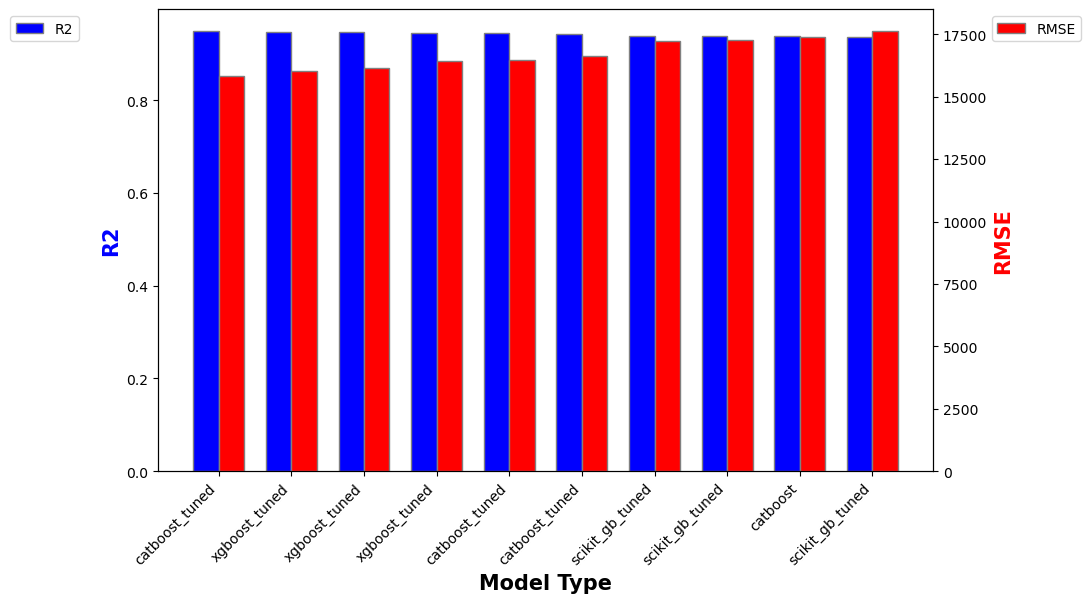

In [68]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Position of bars on X-axis
r1 = range(len(sorted_scores['Model']))
r2 = [x + bar_width for x in r1]

# Plot R2 bars on the primary y-axis (left)
ax1.bar(r1, sorted_scores['r2_5kf_mean'], color='b', width=bar_width, edgecolor='grey', label='R2')

# Create a secondary y-axis (right) for RMSE
ax2 = ax1.twinx()
ax2.bar(r2, sorted_scores['rmse_5kf_mean'], color='r', width=bar_width, edgecolor='grey', label='RMSE')

# Add labels, title, and legend
ax1.set_xlabel('Model Type', fontweight='bold', fontsize=15)
ax1.set_ylabel('R2', fontweight='bold', color='b', fontsize=15)
ax2.set_ylabel('RMSE', fontweight='bold', color='r', fontsize=15)
ax1.set_xticks([r + bar_width / 2 for r in range(len(sorted_scores['Model']))])
ax1.set_xticklabels(sorted_scores['Model'], rotation=45, ha='right')  # Adjust rotation angle as needed

# Move the legend outside the chart
ax1.legend(loc='upper left', bbox_to_anchor=(-0.2, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

In [70]:
sorted_scores

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
82,catboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.949319,15834.922426
43,xgboost_tuned,dummified_onlyNormalCondition,0.948063,16036.566846
46,xgboost_tuned,dummifiedNoDrop_onlyNormalCondition,0.947439,16140.245410
40,xgboost_tuned,ordinal_onlyNormalCondition,0.945529,16422.205699
76,catboost_tuned,ordinal_onlyNormalCondition,0.945148,16470.914927
79,catboost_tuned,dummified_onlyNormalCondition,0.944098,16615.987906
61,scikit_gb_tuned,dummified_onlyNormalCondition,0.939710,17222.610384
64,scikit_gb_tuned,dummifiedNoDrop_onlyNormalCondition,0.939211,17275.923095
67,catboost,ordinal_onlyNormalCondition,0.938718,17394.528056
58,scikit_gb_tuned,ordinal_onlyNormalCondition,0.936694,17624.355359


In [76]:
sorted_scores = scores_df.copy()

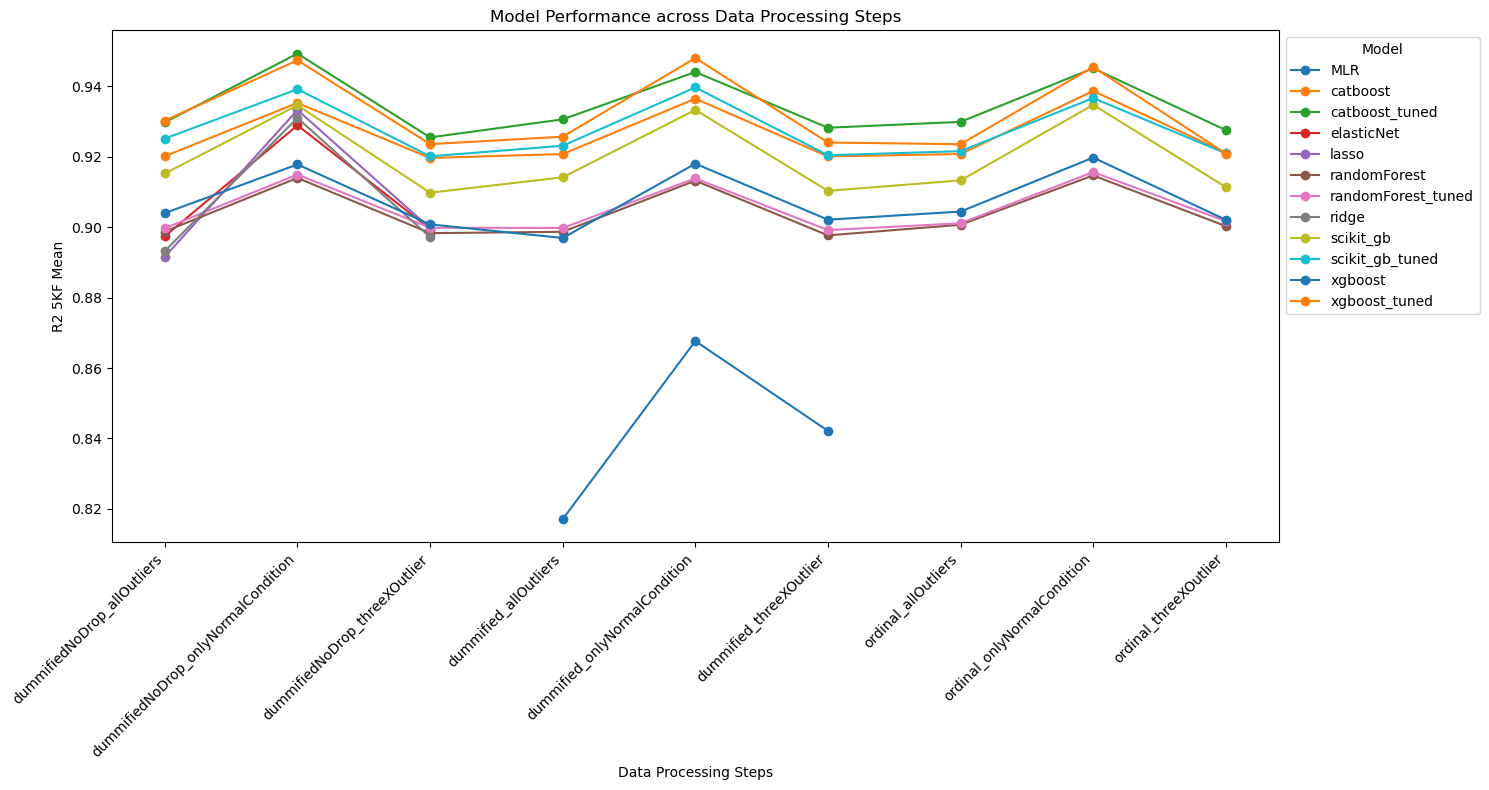

In [77]:
# Pivot the DataFrame for better plotting
pivot_df = sorted_scores.pivot(index='data_process', columns='Model', values='r2_5kf_mean')

# Plotting
plt.figure(figsize=(15, 8))
pivot_df.plot(marker='o', linestyle='-', ax=plt.gca())

# Customize the plot
plt.title('Model Performance across Data Processing Steps')
plt.xlabel('Data Processing Steps')
plt.ylabel('R2 5KF Mean')
plt.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()